<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/TensorFlow4_LSTM_implementation_on_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O /content/sarcasm.json

--2020-04-07 11:17:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/content/sarcasm.json’

/content/sarcasm.js 100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-04-07 11:17:32 (88.8 MB/s) - ‘/content/sarcasm.json’ saved [5643545/5643545]



In [0]:
import numpy as np

#Hyperparameters
vocab_size= 1000
embedding_dim=16
max_length=16
trunc_type='post'
oov_tok= '<OOV>'
training_size=20000

with open('/content/sarcasm.json') as f:
  data= json.load(f)
sentences=[]
labels=[]

for items in data:
  sentences.append(items['headline'])
  labels.append(items['is_sarcastic'])

train_sentence= sentences[0:training_size]
test_sentence= sentences[training_size:]
train_label= labels[0:training_size]
test_label= labels[training_size:]
train_label_final= np.array(train_label)
test_label_final= np.array(test_label)

In [0]:
token= Tokenizer(num_words=vocab_size, oov_token= oov_tok)
token.fit_on_texts(train_sentence)
word_index= token.word_index
#for training data
sequences= token.texts_to_sequences(train_sentence)
padded= pad_sequences(sequences, maxlen=max_length,padding='post', truncating=trunc_type)
#for testing data
test_sequences= token.texts_to_sequences(test_sentence)
test_padded= pad_sequences(test_sequences,padding='post', maxlen=max_length)

In [5]:
#Model with one LSTM
model= tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                            tf.keras.layers.LSTM(64),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 16)            16000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 37,133
Trainable params: 37,133
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Model with one bidirectional LSTM
model1= tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 58,253
Trainable params: 58,253
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Model with two bidirectional LSTM
model2= tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16, 128)           41472     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 157,069
Trainable params: 157,069
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(padded,
          train_label_final,
          epochs=10,
          validation_data=(test_padded, test_label_final))

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.4563 - accuracy: 0.7714 - val_loss: 0.3990 - val_accuracy: 0.8141
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3704 - accuracy: 0.8314 - val_loss: 0.3947 - val_accuracy: 0.8205
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3593 - accuracy: 0.8356 - val_loss: 0.3892 - val_accuracy: 0.8219
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3491 - accuracy: 0.8418 - val_loss: 0.4054 - val_accuracy: 0.8226
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3386 - accuracy: 0.8473 - val_loss: 0.3787 - val_accuracy: 0.8296
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3189 - accuracy: 0.8588 - val_loss: 0.3762 - val_accuracy: 0.8304
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3012 - accuracy: 0.8683 - val_loss: 0.3745 - val_accuracy: 0.8301
Epoc

-----------------------------------------Single Layer LSTM------------------------------------


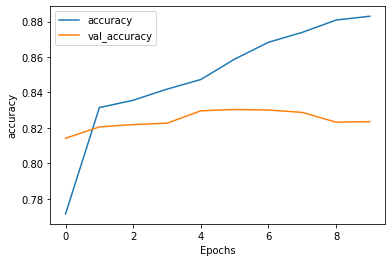

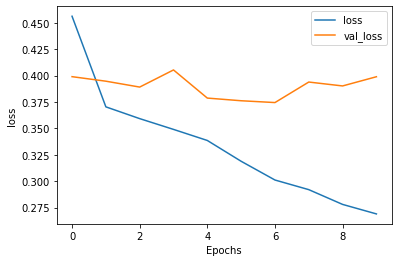

In [9]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()
print('-----------------------------------------Single Layer LSTM------------------------------------')
plot_graph(history, "accuracy")
plot_graph(history, "loss")

In [10]:
history1=model1.fit(padded,
          train_label_final,
          epochs=50,
          validation_data=(test_padded, test_label_final))

Epoch 1/50
625/625 [==============================] - 9s 15ms/step - loss: 0.6880 - accuracy: 0.5597 - val_loss: 0.6854 - val_accuracy: 0.5633
Epoch 2/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6860 - accuracy: 0.5603 - val_loss: 0.6851 - val_accuracy: 0.5633
Epoch 3/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6859 - accuracy: 0.5603 - val_loss: 0.6851 - val_accuracy: 0.5633
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6859 - accuracy: 0.5603 - val_loss: 0.6852 - val_accuracy: 0.5633
Epoch 5/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6859 - accuracy: 0.5603 - val_loss: 0.6851 - val_accuracy: 0.5633
Epoch 6/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6859 - accuracy: 0.5603 - val_loss: 0.6851 - val_accuracy: 0.5633
Epoch 7/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6859 - accuracy: 0.5603 - val_loss: 0.6851 - val_accuracy: 0.5633

-----------------------------------------Single Layer Bidirectional LSTM------------------------------------


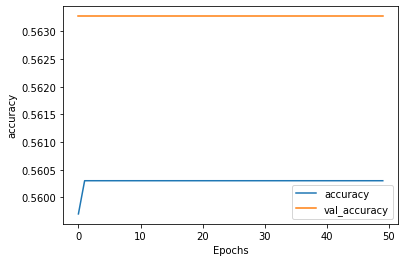

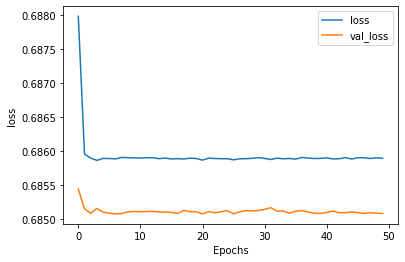

In [11]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()
print('-----------------------------------------Single Layer Bidirectional LSTM------------------------------------')
plot_graph(history1, "accuracy")
plot_graph(history1, "loss")

In [12]:
history2=model2.fit(padded,
          train_label_final,
          epochs=10,
          validation_data=(test_padded, test_label_final))

Epoch 1/10
625/625 [==============================] - 16s 26ms/step - loss: 0.4400 - accuracy: 0.7814 - val_loss: 0.3929 - val_accuracy: 0.8192
Epoch 2/10
625/625 [==============================] - 14s 23ms/step - loss: 0.3613 - accuracy: 0.8357 - val_loss: 0.3779 - val_accuracy: 0.8289
Epoch 3/10
625/625 [==============================] - 14s 23ms/step - loss: 0.3355 - accuracy: 0.8501 - val_loss: 0.3748 - val_accuracy: 0.8275
Epoch 4/10
625/625 [==============================] - 15s 23ms/step - loss: 0.3129 - accuracy: 0.8622 - val_loss: 0.3849 - val_accuracy: 0.8289
Epoch 5/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2996 - accuracy: 0.8676 - val_loss: 0.3795 - val_accuracy: 0.8337
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2870 - accuracy: 0.8768 - val_loss: 0.4030 - val_accuracy: 0.8289
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2803 - accuracy: 0.8792 - val_loss: 0.3923 - val_accuracy:

-----------------------------------------Two Layer Bidirectional LSTM------------------------------------


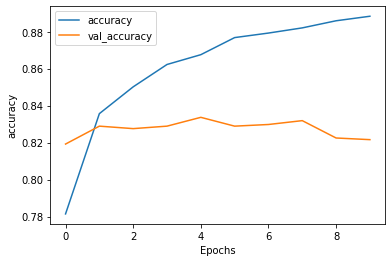

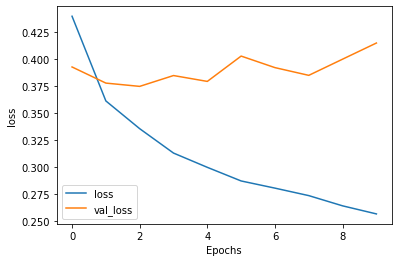

In [13]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()
print('-----------------------------------------Two Layer Bidirectional LSTM------------------------------------')
plot_graph(history2, "accuracy")
plot_graph(history2, "loss")